In [5]:
import pandas as pd
import numpy as np
ds = pd.read_csv(r"C:\Users\KVarshith\OneDrive - RealPage\Documents\Student_Performance_Prediction\student_performance_dataset.csv")
df = pd.DataFrame(ds)
df.head(5)

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [7]:
#Drop Unwanted columns
df.drop(columns = ['Student_ID'],inplace = True)

In [11]:
#Handle missing values
df.fillna(df.median(numeric_only = True),inplace = True)
for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
#Encode Categorical Variables
categorical_cols = df.select_dtypes(include = 'object').columns.tolist()
categorical_cols

['Gender',
 'Parental_Education_Level',
 'Internet_Access_at_Home',
 'Extracurricular_Activities',
 'Pass_Fail']

In [15]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
label_encoders = {}
for col in categorical_cols:
    if df[col].nunique() == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [16]:
#One-hot encoding for multi-category columns
df = pd.get_dummies(df, drop_first = True)

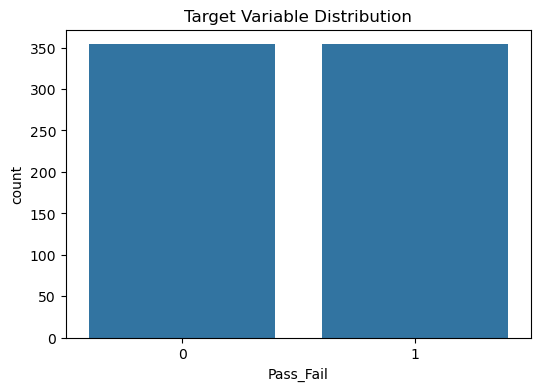

In [19]:
#visualize the class distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='Pass_Fail', data=df)
plt.title("Target Variable Distribution")
plt.show()

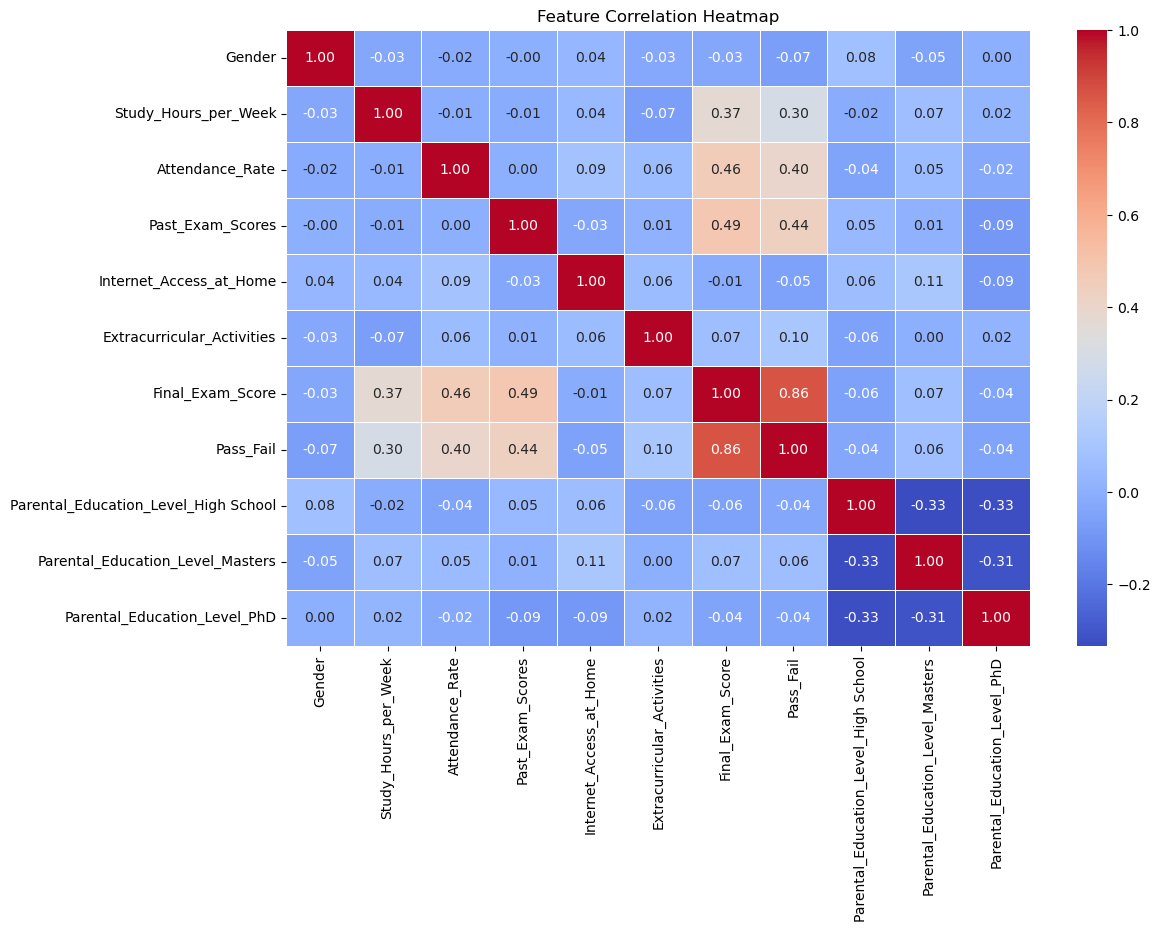

In [20]:
#Co-relation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [22]:
#Feature Extraction
X = df.drop(columns = ['Pass_Fail'])
Y = df['Pass_Fail']

In [31]:
#Scale features for future models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
#Top 10 Feature Importances
fs_imps = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
fs_imps = fs_imps.sort_values(by='Importance', ascending=False)
print("\nTop 10 Features by Importance:\n", fs_imps.head(10))


Top 10 Features by Importance:
                                 Feature  Importance
6                      Final_Exam_Score    0.776088
2                       Attendance_Rate    0.079244
3                      Past_Exam_Scores    0.075131
1                  Study_Hours_per_Week    0.049794
5            Extracurricular_Activities    0.004227
0                                Gender    0.004051
9          Parental_Education_Level_PhD    0.003101
4               Internet_Access_at_Home    0.002943
7  Parental_Education_Level_High School    0.002806
8      Parental_Education_Level_Masters    0.002615


C:\Users\KVarshith\AppData\Local\Temp\ipykernel_23900\2322737408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fs_imps, palette='viridis')


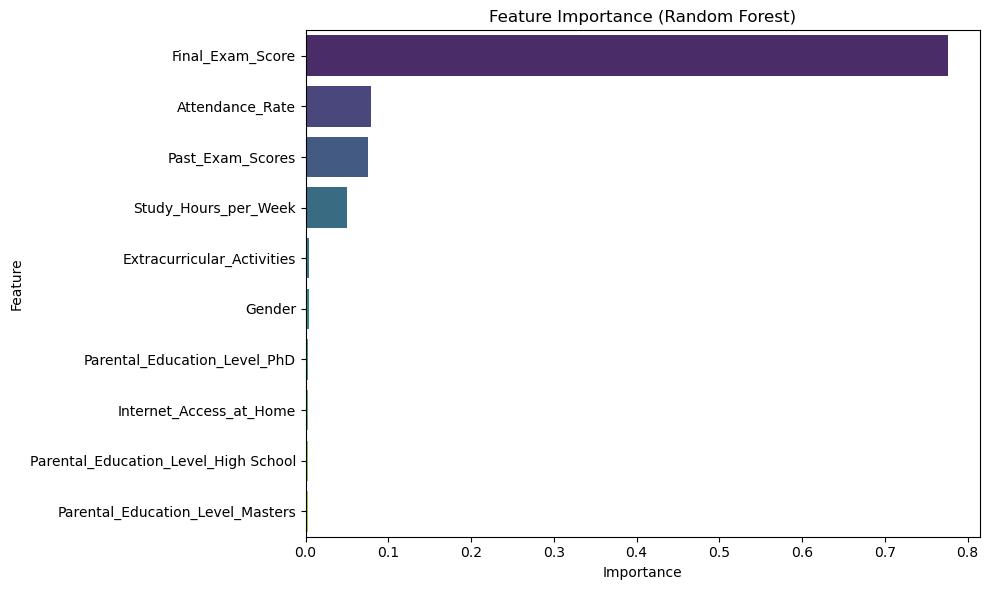

In [34]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fs_imps, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [47]:
#Comparitive Analysis between different Machine Learning models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)

models = {
    "Logistic Regression": LogisticRegression(C=0.01),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=3,min_samples_leaf=2),
    "SVM": SVC(C=0.01, kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=1),
}

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predictions

    acc = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "Classification Report": clf_report,
        "Confusion Matrix": conf_matrix
    }

# Print results for each model
for name, metrics in results.items():
    print(f"\n{name}")
    print(f"Accuracy: {metrics['Accuracy']:.1%}")
    print("Classification Report:\n", metrics["Classification Report"])
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("\n\n")
    
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(max_depth=3), X_scaled, Y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())



Logistic Regression
Accuracy: 93.7%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        71
           1       0.91      0.97      0.94        71

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142

Confusion Matrix:
 [[64  7]
 [ 2 69]]




Decision Tree
Accuracy: 100.0%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        71

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

Confusion Matrix:
 [[71  0]
 [ 0 71]]




Random Forest
Accuracy: 100.0%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00   

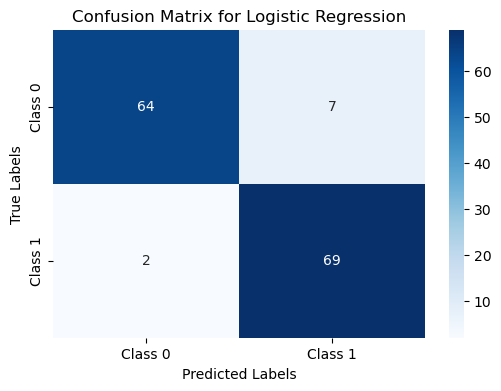

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Example usage (Replace model_name accordingly)
plot_confusion_matrix(y_test, models["Logistic Regression"].predict(X_test), "Logistic Regression")
